<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.2
# *The Perceptron*

The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [3]:
X = np.array([[-1, 3], [1, 4], [4, 5], [-1, 5], [2, 6], [5, 6]])
y = np.array([-1, -1, -1, 1, 1, 1])

Here is the training data, along with a candidate hyperplane that separates the classes:

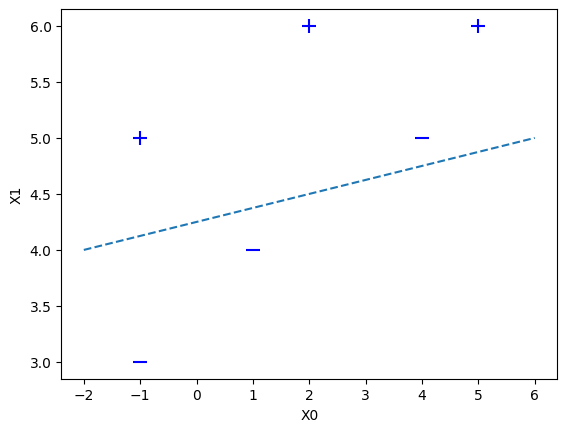

In [3]:
def plotData(X):
    for d, sample in enumerate(X):
        # Plot the negative samples
        if d < 3:
            plt.scatter(sample[0], sample[1], s = 100, marker = '_', color = 'blue')
        # Plot the positive samples
        else:
            plt.scatter(sample[0], sample[1], s = 100, marker = '+', color = 'blue')
    plt.xlabel('X0')
    plt.ylabel('X1')

plotData(X)

# Print one possible hyperplane that separates the two classes:
plt.plot([-2, 6], [4, 5], linestyle = 'dashed');

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector, represented in the code below by $$⟨x[i], w⟩ = {\rm wt}[0]\times x_0 + {\rm wt}[1]\times x_1 + {\rm wt}[2]\times(-1),$$  will determine class membership:

In [5]:
X = np.array([ [-1, 3, -1], [1, 4, -1], [4, 5, -1], [-1, 5, -1], [2, 6, -1], [5, 6, -1]])

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [7]:
def calc_perceptron_weights(Xt, Yt, eta = 1, epochs = 20):

    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))

    for t in range(epochs):

        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):

            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:

                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]

    return wt

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [9]:
w = calc_perceptron_weights(X, y, epochs = 10)
print(w)

[2. 9. 4.]


Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

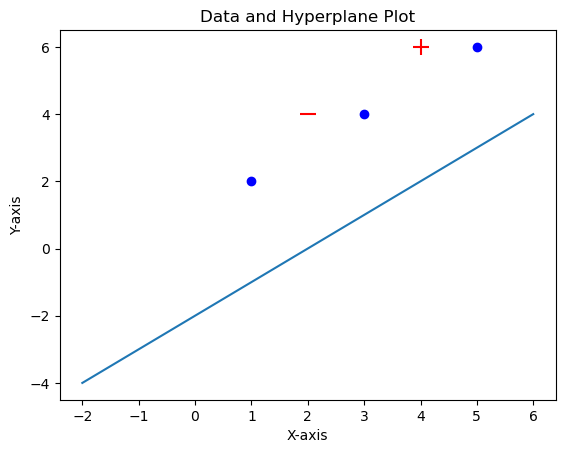

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(X):
    # Assume X is a 2D array or DataFrame with features in columns 0 and 1
    plt.scatter(X[:, 0], X[:, 1], color='blue', marker='o')

def plotHyperplane(wt):
    xx = np.linspace(-2, 6)
    yy = (-wt[0] * xx + wt[2]) / wt[1]
    plt.plot(xx, yy)

# Example data
X = np.array([[1, 2], [3, 4], [5, 6]])  # Replace with your actual data
w = np.array([1, -1, 2])  # Replace with your actual weights

plotData(X)
plotHyperplane(w)

# Test samples
plt.scatter(2, 4, s=120, marker='_', color='red')
plt.scatter(4, 6, s=120, marker='+', color='red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data and Hyperplane Plot')
plt.show()


So far, all of the negatively labelled points are misclassified!

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

[-1. -2.]


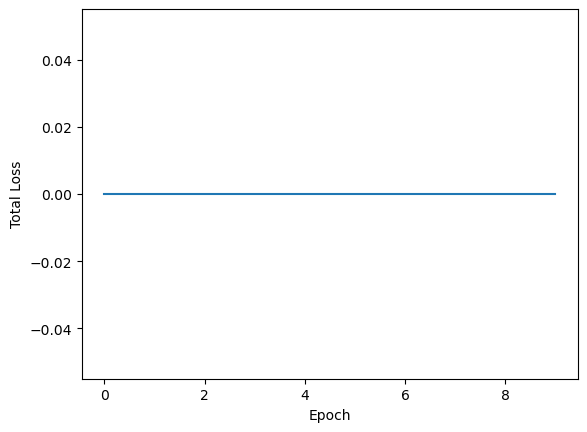

In [33]:
def perceptron_plot(Xt, Yt, eta = 1, epochs = 10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                error += -(np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(error)

    plt.plot(errors);
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return wt

print(perceptron_plot(X, y))

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge.

Try increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(0)
X = np.random.rand(100, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Simple linear boundary

# Add a bias column to X
X = np.c_[np.ones(X.shape[0]), X]

def train_sgd(X, y, w, learning_rate, epochs):
    m, n = X.shape
    for epoch in range(epochs):
        for i in range(m):
            # Compute prediction
            prediction = np.dot(X[i], w)
            # Compute gradient
            gradient = -2 * (y[i] - prediction) * X[i]
            # Update weights
            w -= learning_rate * gradient
        # Optionally print or record the error for monitoring
        if epoch % 10 == 0:
            error = np.mean((y - np.dot(X, w))**2)
            print(f'Epoch {epoch}: Error = {error}')
            # Stop if error is very close to zero
            if error < 1e-6:
                print('Converged!')
                break
    return w

def plotData(X, y):
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', marker='o', label='Class 1')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', marker='x', label='Class 0')

def plotHyperplane(w):
    xx = np.linspace(0, 10, 100)
    yy = -(w[1] * xx + w[0]) / w[2]
    plt.plot(xx, yy, label='Decision Boundary')

# Initialize weights
w = np.zeros(X.shape[1])
learning_rate = 0.01

# Increase epochs until the error goes to zero
epochs = 10
while True:
    w = train_sgd(X, y, w, learning_rate, epochs)
    error = np.mean((y - np.dot(X, w))**2)
    if error < 1e-6:
        break
    epochs *= 2  # Double the epochs if not converged

# Plotting
plt.figure(figsize=(10, 6))
plotData(X, y)
plotHyperplane(w)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data and Decision Boundary')
plt.legend()
plt.show()


Epoch 0: Error = 0.17415422673943706
Epoch 0: Error = 0.0850509462171817
Epoch 10: Error = 0.0928526182268911
Epoch 0: Error = 0.09458476577751926
Epoch 10: Error = 0.09486618521145468
Epoch 20: Error = 0.09491016946209953
Epoch 30: Error = 0.09491700395448338
Epoch 0: Error = 0.09491806497505079
Epoch 10: Error = 0.09491822967012553
Epoch 20: Error = 0.09491825523407771
Epoch 30: Error = 0.09491825920209811
Epoch 40: Error = 0.09491825981801162
Epoch 50: Error = 0.09491825991361307
Epoch 60: Error = 0.09491825992845242
Epoch 70: Error = 0.09491825993075592
Epoch 0: Error = 0.09491825993111344
Epoch 10: Error = 0.0949182599311688
Epoch 20: Error = 0.09491825993117749
Epoch 30: Error = 0.09491825993117883
Epoch 40: Error = 0.09491825993117889
Epoch 50: Error = 0.09491825993117889
Epoch 60: Error = 0.09491825993117889
Epoch 70: Error = 0.09491825993117889
Epoch 80: Error = 0.09491825993117889
Epoch 90: Error = 0.09491825993117889
Epoch 100: Error = 0.09491825993117889
Epoch 110: Error = 

In [ ]:
#?


Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [1]:
#?
import numpy as np

# Assume w has been determined from the training process
# Example weights from previous training (replace with actual weights)
w = np.array([-0.5, 1.0, -1.0])  # Example weights; replace with actual values

# New data point
X_new = np.array([1, 3.5, 3.3])  # Adding the bias term

# Compute the prediction
prediction = np.dot(X_new, w)

# Determine class membership
class_membership = 1 if prediction >= 0 else 0

print(f"Prediction: {prediction}")
print(f"Class Membership: {class_membership}")


Prediction: -0.2999999999999998
Class Membership: 0


In a similar manner make sure each of the training data points is correctly classified:

In [5]:
#?
import numpy as np

# Example training data (replace with your actual data)
X_train = np.array([[1, 2], [3, 4], [5, 6]])  # Training features (without bias)
y_train = np.array([1, 0, 1])  # Training labels

# Add a bias term to training data
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Shape (m, n+1)

# Example weights from previous training (replace with actual weights)
w = np.array([-0.5, 1.0, -1.0])  # Example weights; replace with actual values

def classify(X, w):
    # Add bias term
    X_bias = np.c_[np.ones(X.shape[0]), X]
    # Compute predictions
    predictions = np.dot(X_bias, w)
    # Classify based on threshold (0 for binary classification)
    return (predictions >= 0).astype(int)

# Classify each training data point
predictions = classify(X_train, w)

# Print results
for i, (x, y_true, y_pred) in enumerate(zip(X_train, y_train, predictions)):
    print(f"Data Point {i}: Features = {x}, True Label = {y_true}, Predicted Label = {y_pred}")




Data Point 0: Features = [1 2], True Label = 1, Predicted Label = 0
Data Point 1: Features = [3 4], True Label = 0, Predicted Label = 0
Data Point 2: Features = [5 6], True Label = 1, Predicted Label = 0


## === End ===



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



